In [440]:
import yfinance as yf 
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


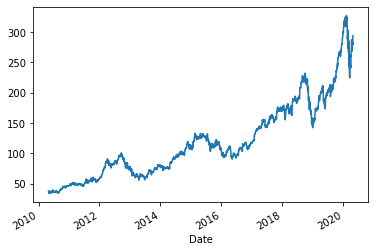

In [441]:
AAPL = yf.download('AAPL','2010-05-01','2020-05-01')
AAPL = AAPL.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
AAPL.Close.plot()
plt.show()

[*********************100%***********************]  1 of 1 completed


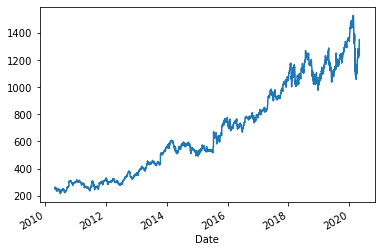

In [442]:
GOOG = yf.download('GOOG','2010-05-01','2020-05-01')
GOOG = GOOG.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
GOOG.Close.plot()
plt.show()

[*********************100%***********************]  1 of 1 completed


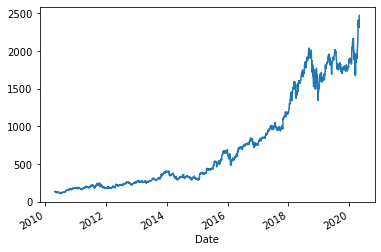

In [443]:
AMZN = yf.download('AMZN','2010-05-01','2020-05-01')
AMZN = AMZN.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
AMZN.Close.plot()
plt.show()

#### Question 2

● Compute returns $r_i = (P_{i+1} - P_{i}) / P_{i}$, where i is today, and i + 1 is tomorrow

● So, r_i represents the return of an investment buying / selling today (day i) to selling /
buying tomorrow (day i + 1).

● Can you compute some statistics on the return time series?

● For each stock

○ What is its distribution? Gaussian, Student-t with \nu degrees of freedom?

○ Is the distribution stationary over time? (Hint: look for stationarity 
tests)

○ Is there any auto-correlation in the time series?

○ Are there any interesting relationships between the returns of different stocks at
the same time (contemporaneous) or different times? (Hint: look at correlation,
Granger causality, PCA decomposition of returns)

In [444]:
def returns(df):
    return (df.Close - df.Close.shift(1)) / df.Close.shift(1)

In [445]:
AAPL['r'] = returns(AAPL)
GOOG['r'] = returns(GOOG)
AMZN['r'] = returns(AMZN)

In [446]:
AAPL.drop(columns='Close', inplace=True)
GOOG.drop(columns='Close', inplace=True)
AMZN.drop(columns='Close', inplace=True)

In [447]:
AAPL.dropna(inplace=True)
GOOG.dropna(inplace=True)
AMZN.dropna(inplace=True)

In [448]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "nct", "t"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [449]:
get_best_distribution(AAPL.r)

p value for norm = 1.2337318526646413e-12
p value for exponweib = 2.707446305932546e-11


C:\Users\dmvyp\Anaconda5\lib\site-packages\scipy\stats\_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for nct = 0.7699731323154667
p value for t = 0.7920286365856262
Best fitting distribution: t
Best p value: 0.7920286365856262
Parameters for the best fit: (3.3490705753323113, 0.0010572990985126254, 0.011481192358290603)


('t',
 0.7920286365856262,
 (3.3490705753323113, 0.0010572990985126254, 0.011481192358290603))

In [450]:
get_best_distribution(GOOG.r)

p value for norm = 3.1725103135218524e-15
p value for exponweib = 3.1009868246731837e-16


C:\Users\dmvyp\Anaconda5\lib\site-packages\scipy\stats\_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for nct = 0.6138869140119856
p value for t = 0.6519006391747378
Best fitting distribution: t
Best p value: 0.6519006391747378
Parameters for the best fit: (3.03559779156682, 0.0008527573077542585, 0.00992975073715852)


('t',
 0.6519006391747378,
 (3.03559779156682, 0.0008527573077542585, 0.00992975073715852))

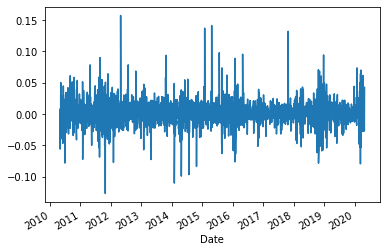

In [451]:
AMZN.r.plot()
plt.show()

In [452]:
import statsmodels as sm

In [453]:
from statsmodels.tsa.stattools import adfuller

In [454]:
print("Stationarity")
print()
result = adfuller(AAPL.r, autolag='AIC')
print(f'ADF: {result[0]}')
print(f'p-value: {result[1]}')
flag = True
print('Critial values:')
for key, value in result[4].items():
    if result[0] > value:
        flag = False
    print(f'   {key}, {value}')
if result[1]<0.05 and flag:
    print('Returns are stationary!')

Stationarity

ADF: -10.280101999715539
p-value: 3.799370601750962e-18
Critial values:
   1%, -3.4329736635735393
   5%, -2.8626991196096556
   10%, -2.5673870444295406
Returns are stationary!


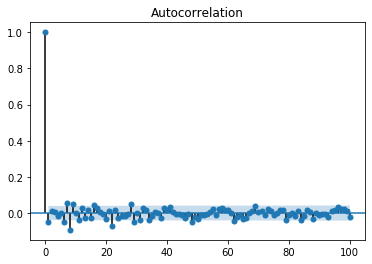

In [455]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(GOOG.r, lags=100)
pyplot.show()

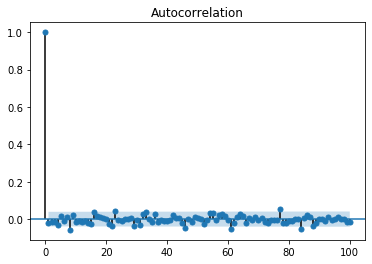

In [474]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(AMZN.r, lags=100)
pyplot.show()

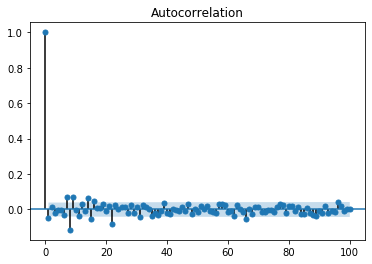

In [475]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(AAPL.r, lags=100)
pyplot.show()

Autocorrelation is weak.

In [457]:
#Correlations
print(AMZN.r.corr(GOOG.r))
print(AAPL.r.corr(GOOG.r))
print(AMZN.r.corr(AAPL.r))

0.5764219481121843
0.532383467470703
0.4310499883541834


We see some correlation between stocks, which is quite logical, beacause companies are from the same industry.

#### Question 3

● Assume you have an equity strategy that every day makes a prediction $f_i$ on the value of $r_i$

● The profit-and-loss (PNL) for each day is: $pnl_i = f_i * r_i$

● Assume that $f_i$ is standard Gaussian with mean = 0 and std dev = 1

● Generate a few random realizations of $f_i$: plot $pnl_i$ and $pnl = cumsum(pnl_i)$

In [458]:
def pnl(df, f):   
    df['pnl'] = df['r'] * f
    df['cumsum'] = df['pnl'].cumsum()
    fig, axs = plt.subplots(2)
    fig.suptitle('PNL and cumsum')
    axs[0].plot(df['pnl'])
    axs[1].plot(df['cumsum'])
    #return

In [459]:
mu, sigma = 0, 1 
f = np.random.normal(mu, sigma, AAPL.shape[0])

With normal distribution:

Apple


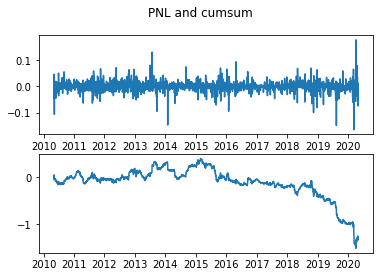

In [460]:
print('Apple')
pnl(AAPL, f)

Google


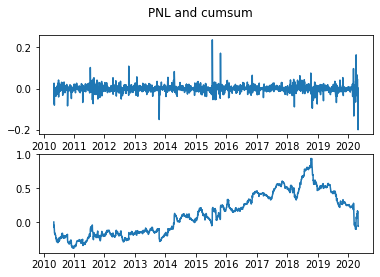

In [461]:
print('Google')
pnl(GOOG, f)

Amazon


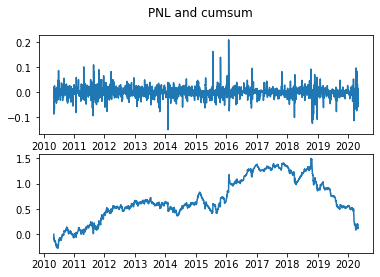

In [462]:
print('Amazon')
pnl(AMZN, f)

Student

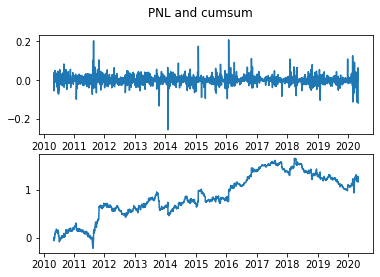

In [463]:
f1 = np.random.standard_t(20, AAPL.shape[0])
pnl(AMZN, f1)

#### Question 4

● For a PNL time series, define the Sharpe Ratio to be $SR = E[pnl_i] / \sqrt{Var[pnl_i]}$

● Assume that f_i has a given hit rate = $1/n \sum_i (sign(f_i) == sign(r_i))$

○ Hit rate is a measure of accuracy and represents how often we predict the
direction of the stock movement correctly

● Remember that f_i is a random variable, and so you can draw different realizations of it

● What is the distribution of the $SR(pnl_i)$ given $f_i$?

○ Ideally, you want to generate a plot varying hit_rate from 0 to 1.0 on the x-axis
and computing the corresponding distribution of SR on the y-axis

○ Note that $pnl_i$ is a random var since it is a function of the random variable $f_i$

○ You can plot the distribution as a box plot or using just mean and std err

In [472]:
def SR(df, func):
    df['pnl'] = df['r'] * df['f']
    df['cumsum'] = df['pnl'].cumsum()
    if func is None:
        sr = df['pnl'].mean()/np.sqrt(df['pnl'].var())
    else:
        sr = func(df['r'], df['f'])
    h_rate =  (np.sign(df['r']) == np.sign(df['f'])).sum()/df.shape[0]
    return sr, h_rate

In [350]:
mu, sigma = 0, 1
f = np.random.normal(mu, sigma, AAPL.shape[0])

In [478]:
AAPL.shape[0]

2517

In [483]:
2517/60

41.95

In [486]:
def hh(df, f, func = None):  
    df['f'] = f
    print(SR(df, func))
    n_=df.shape[0]//2-df.shape[0]//100
    df = df.sort_values(by=['pnl'], ascending = False)
    dogs = pd.Series(df['f'][:n_])
    cats = np.random.normal(mu, sigma, n_)
    df.loc[:n_,'f'] = cats*(np.sign(dogs))*(-np.sign(cats))
    print(SR(df, func))
    h_arr = []
    sr_arr = []
    std_er = []
    mean_ar = []
    k=100
    for i in range(k):
        n_ = df.shape[0]//k
        df = df.sort_values(by=['pnl'])
        dogs = pd.Series(df['f'][:n_])
        cats = np.random.normal(mu, sigma, n_)
        df.loc[:n_,'f'] = cats*(np.sign(dogs))*(-np.sign(cats))
        _, h_rate = SR(df, func)
        h_arr.append(h_rate)
        srr = []
        for i in range(100):
            cats = np.random.normal(mu, sigma, n_)
            df.loc[:n_,'f'] = cats*(np.sign(dogs))*(np.sign(cats))
            sr, h_rate = SR(df, func)
            srr.append(sr)
        sr_arr.append(srr)
        std_er.append(st.sem(srr, axis=None, ddof=0))
        mean_ar.append(np.mean(srr))
    fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
    axs[0].scatter(h_arr, mean_ar)
    axs[0].set_xlabel('Hit Rate')
    axs[0].set_ylabel('SR Mean')
    axs[0].set_title('Mean')
    
    axs[1].scatter(h_arr, std_er)
    axs[1].set_xlabel('Hit Rate')
    axs[1].set_ylabel('SR std error')
    
    axs[1].set_title('Std Error')

(0.0027291172469910644, 0.5073500198649186)
(-0.6469172046093846, 0.01748112832737386)


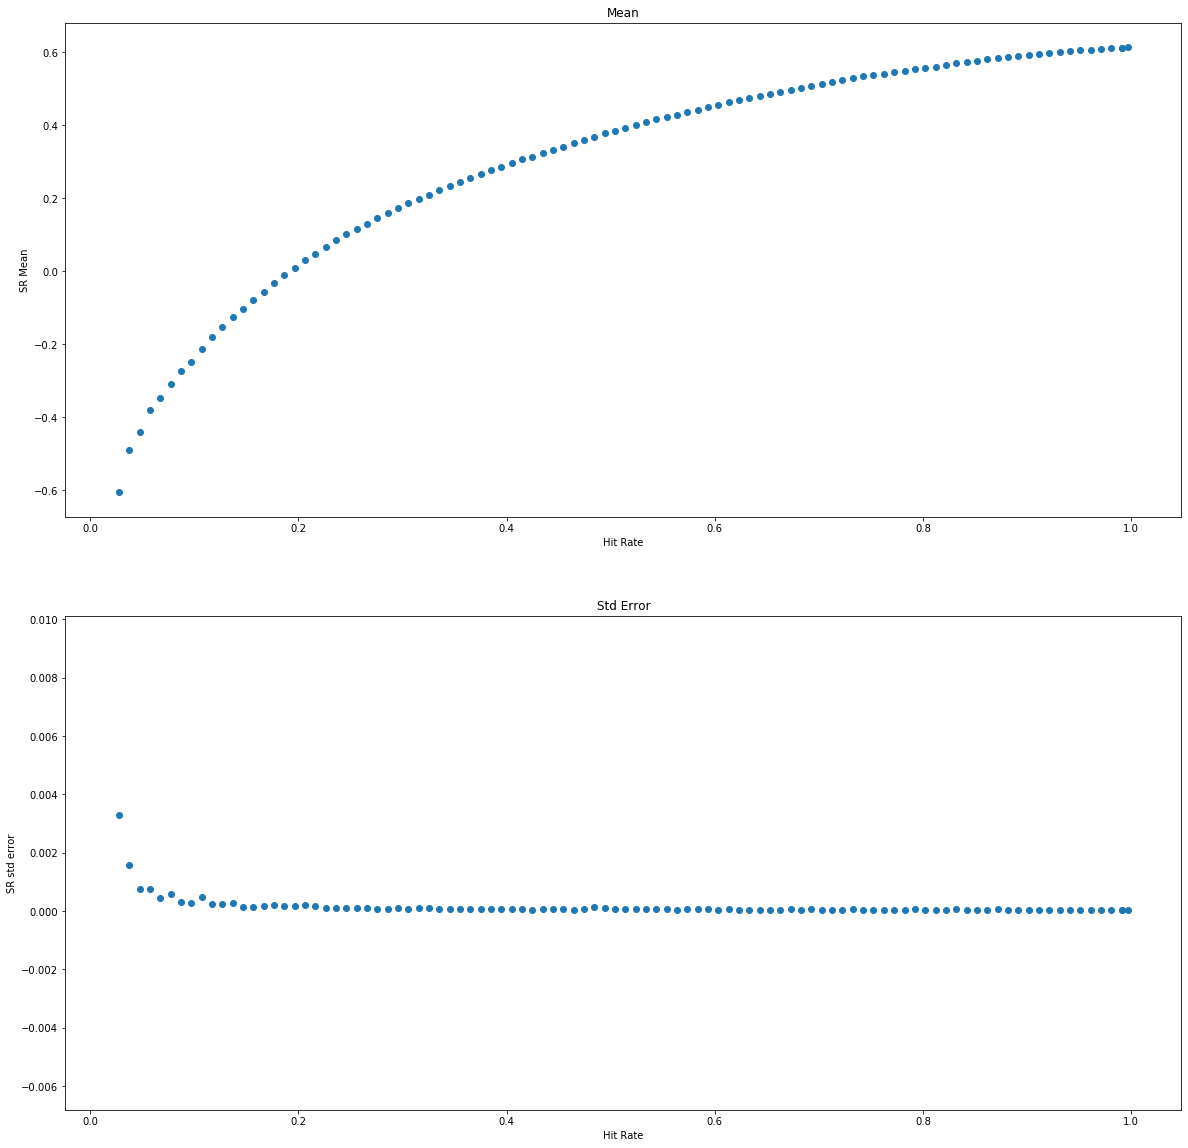

In [487]:
hh(AMZN, f)

(-0.031105281202908702, 0.49304727850615815)
(-0.6943238803521188, 0.0031783869686134287)


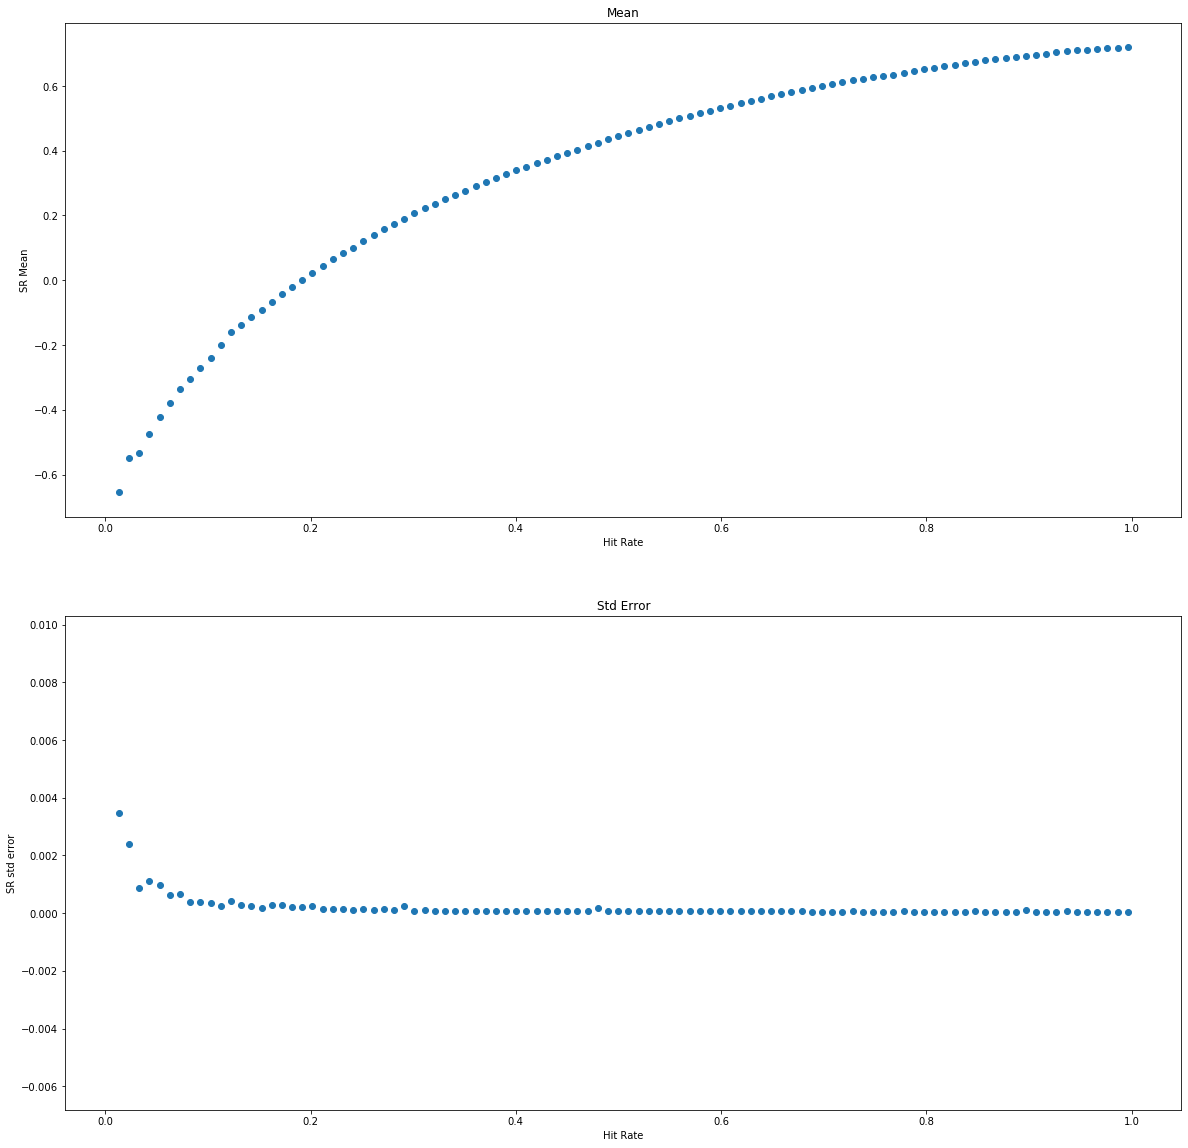

In [490]:
hh(AAPL, f)

(-0.0013611726153514385, 0.49106078665077474)
(-0.6286280903480604, 0.0011918951132300357)


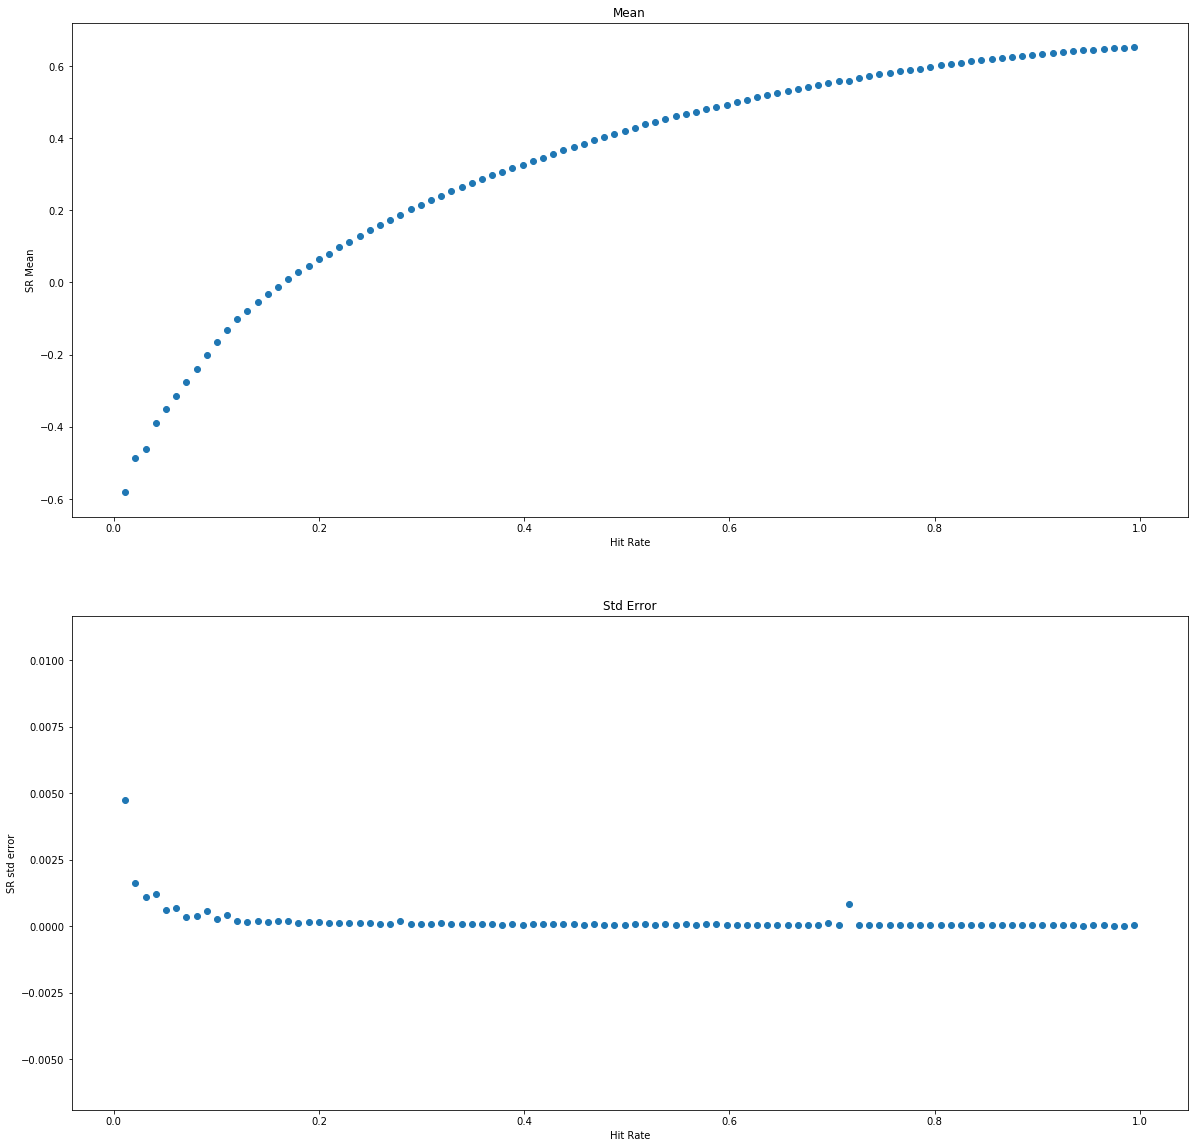

In [491]:
hh(GOOG, f)

#### Question 5

● What if, instead of hit rate, you use root mean square error (RMSE) between $f_i$ and $r_i$?

● How does the distribution of SR change?

● What if you use mean absolute deviation (MAD) of $f_i$ and $r_i$?

● Make the code flexible to changing input measures (hit rate, RMSE, MAD) and output measures

In [470]:
from sklearn.metrics import mean_squared_error

(0.9579907279918726, 0.5073500198649186)
(0.9842769483640748, 0.01748112832737386)


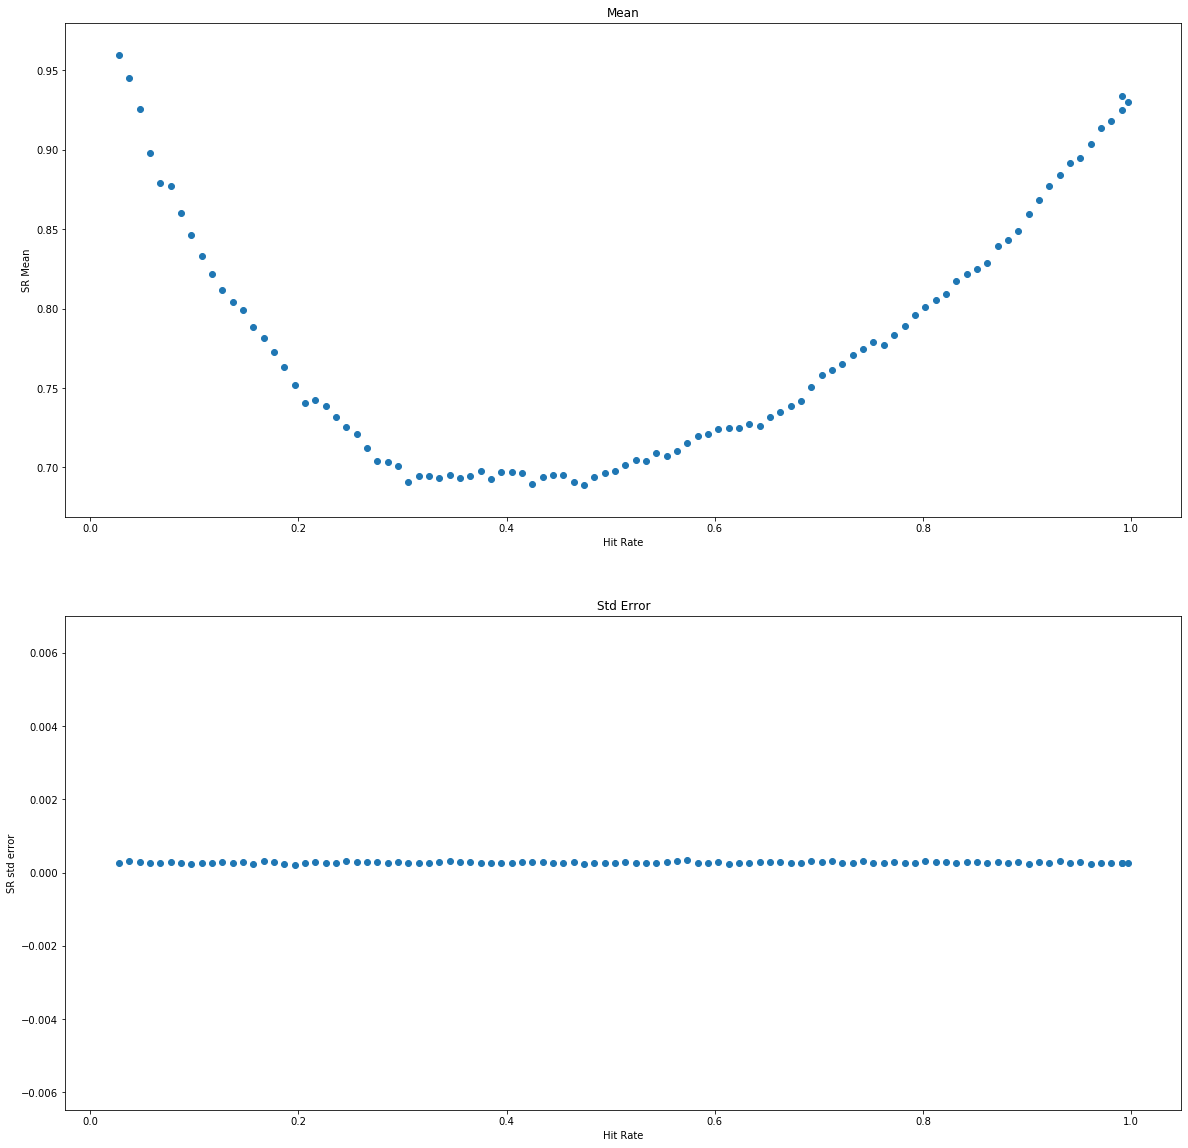

In [492]:
hh(AMZN, f, mean_squared_error)

(0.958011531918679, 0.49106078665077474)
(0.9765603118748498, 0.0011918951132300357)


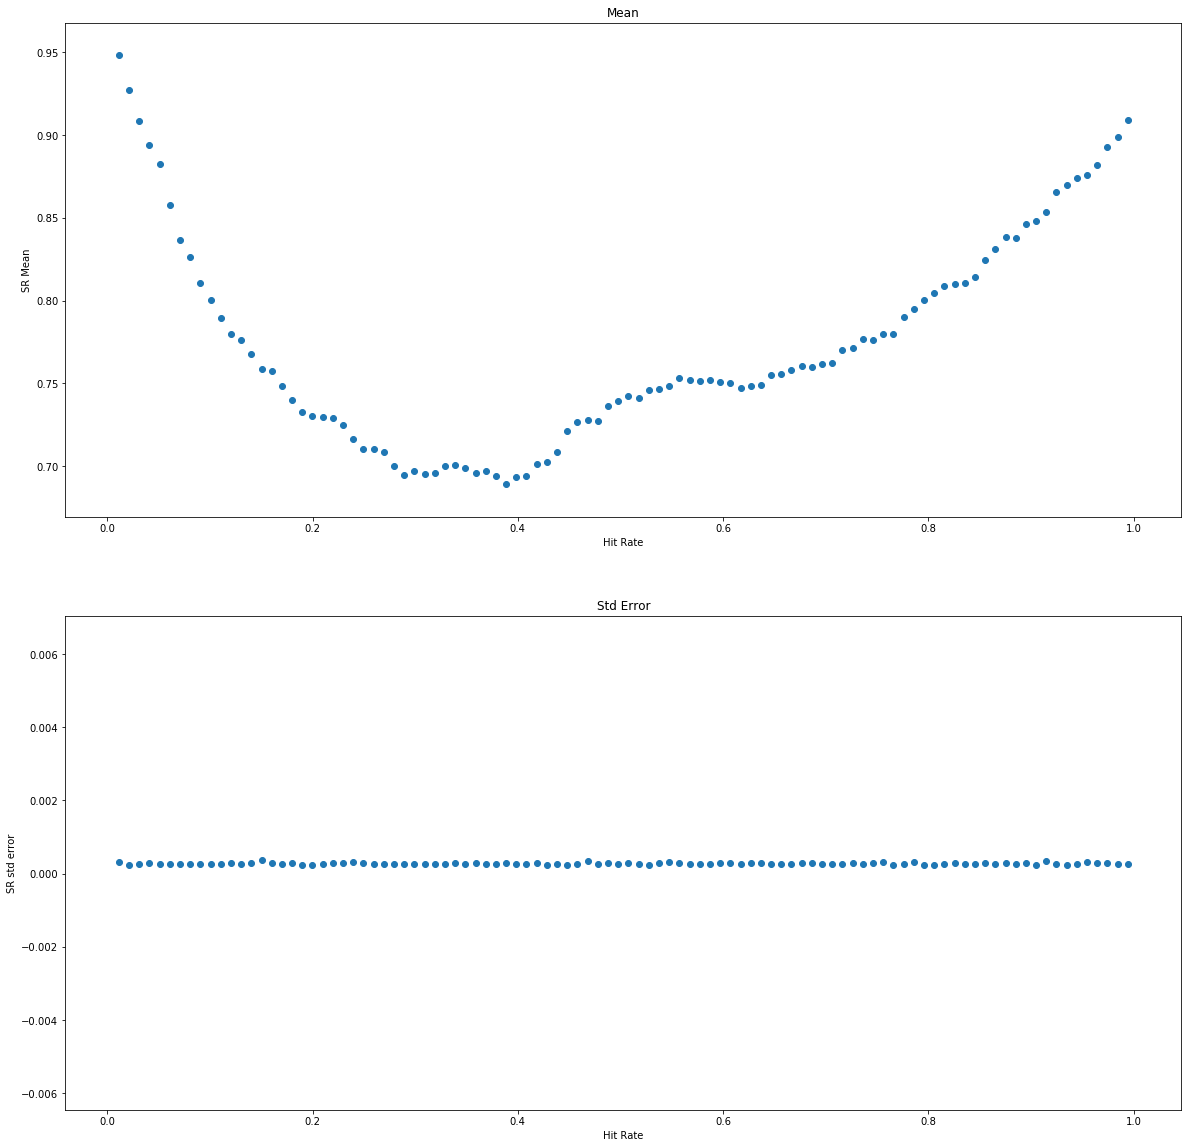

In [493]:
hh(GOOG, f, mean_squared_error)

(0.9590560706641674, 0.49304727850615815)
(0.9765814059553072, 0.0031783869686134287)


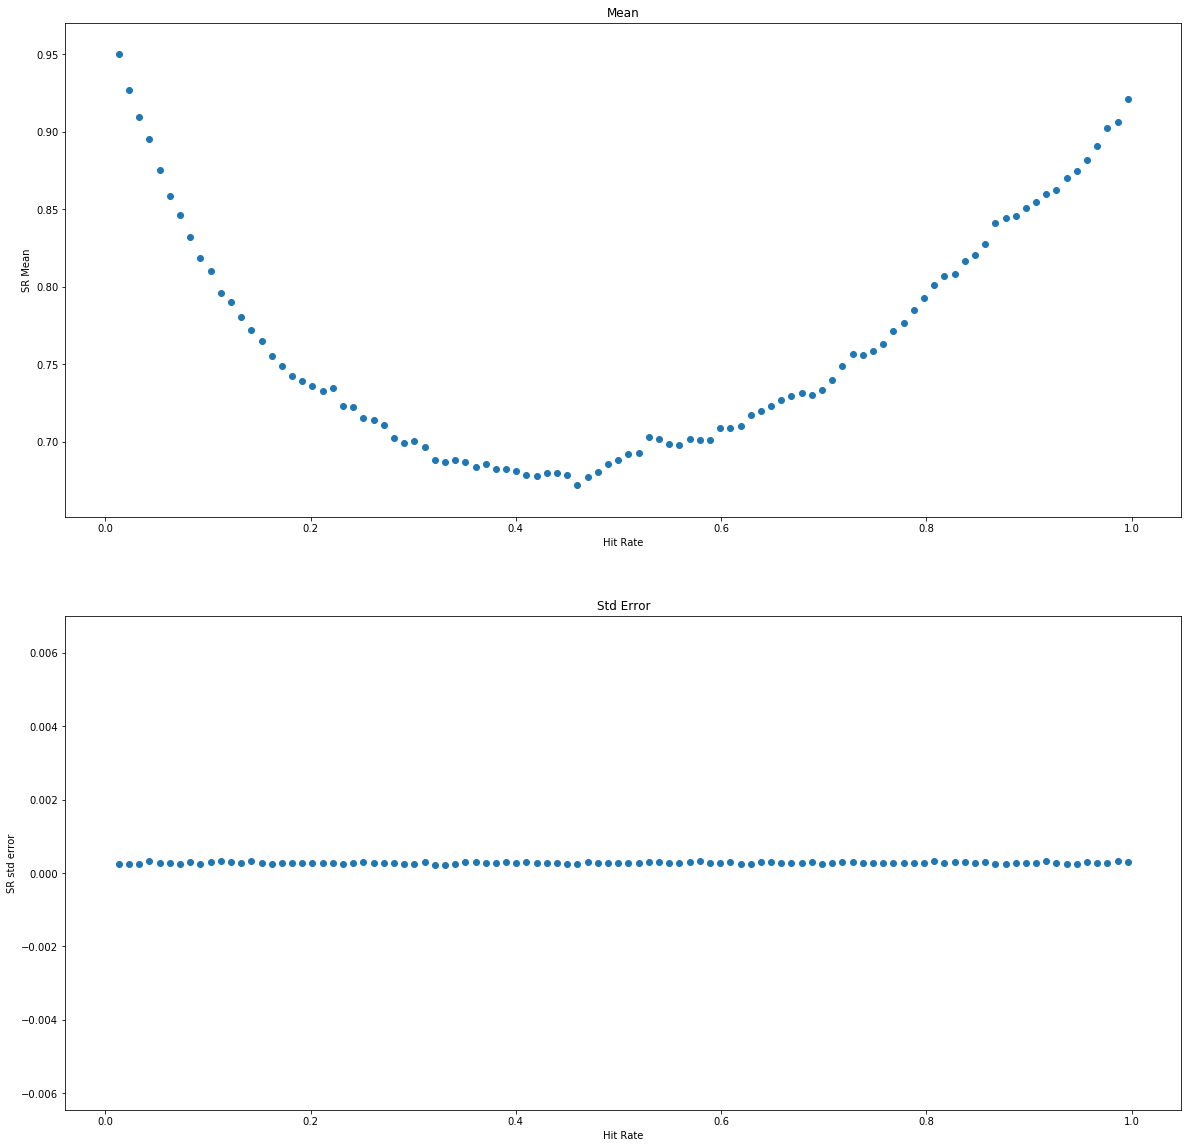

In [494]:
hh(AAPL, f, mean_squared_error)

As you see, code is flexible :)

From my knowledge MAD is used for one variable, so i did not really understand what this task means. Still, my function is flexible for most of the function such as RMSE.